In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Leer los archivos CSV
df1 = pd.read_csv('OpenAlex_seismic_waves.csv')
df2 = pd.read_csv('Scopus_seismic_waves.csv')

# Crear conjuntos combinados de títulos y DOIs para cada DataFrame
set1 = set(df1['Title']).union(set(df1['DOI']))
set2 = set(df2['Title']).union(set(df2['DOI']))

# Identificar duplicados basados en las columnas 'DOI' y 'Title'
combined_df = pd.concat([df1, df2])
duplicated_df = combined_df[combined_df.duplicated(subset=['DOI', 'Title'], keep=False)]

# Mostrar los duplicados
print("Duplicados:")
print(duplicated_df)

# Guardar los duplicados en un nuevo archivo CSV
duplicated_df.to_csv('duplicados.csv', index=False)

# Contar la cantidad de duplicados
num_duplicates = len(duplicated_df)
print(f"Cantidad de duplicados: {num_duplicates}")

# Contar cantidad de no duplicados
num_no_duplicates = len(combined_df) - num_duplicates
print(f"Cantidad de no duplicados: {num_no_duplicates}")



Duplicados:
          Key        Item Type  Publication Year  \
0    4HJHXAY4   journalArticle              2019   
1    MZIPTLI4   journalArticle              2019   
6    ZMMMQLST   journalArticle              2021   
7    WUMK4GZP   journalArticle              2018   
9    PHJGNGWJ   journalArticle              2021   
..        ...              ...               ...   
94   9I4CWYIK   journalArticle              2022   
96   WNH4P9ZQ   journalArticle              2021   
99   ICB7GFIR   journalArticle              2021   
100  X5645IEV  conferencePaper              2018   
104  B2SLDBV4  conferencePaper              2018   

                                                Author  \
0                Yu, Siwei; Ma, Jianwei; Wang, Wenlong   
1       Mosser, Lukas; Dubrule, Olivier; Blunt, Martin   
6     Song, Chao; Alkhalifah, Tariq; bin Waheed, Umair   
7            Wang, Wenlong; Yang, Fangshu; Ma, Jianwei   
9    Yang, Yan; Gao, Angela; Castellanos, Jorge; Ro...   
..             

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Leer los archivos CSV
df1 = pd.read_csv('OpenAlex_seismic_waves.csv')
df2 = pd.read_csv('Scopus_seismic_waves.csv')

# Identificar duplicados basados en la columna 'Title'
combined_df = pd.concat([df1, df2])
duplicated_df = combined_df[combined_df.duplicated(subset=['Title'], keep=False)]

# Mostrar los duplicados
#print("Duplicados:")
#print(duplicated_df)

# Guardar los duplicados en un nuevo archivo CSV
duplicated_df.to_csv('duplicados.csv', index=False)

# Contar la cantidad de duplicados
num_duplicates = len(duplicated_df)
print(f"Cantidad de duplicados: {num_duplicates}")

# Contar cantidad de no duplicados
num_no_duplicates = len(combined_df) - num_duplicates
print(f"Cantidad de no duplicados: {num_no_duplicates}")



Cantidad de duplicados: 128
Cantidad de no duplicados: 101


Scopus sin duplicados:
          Key        Item Type  Publication Year  \
1    FMC59VW4   journalArticle              2020   
2    NF5UUJBE   journalArticle              2021   
3    AECBBNXL   journalArticle              2024   
4    98QQB78B   journalArticle              2022   
7    I86SGPQ7   journalArticle              2024   
15   BFBQGF7P   journalArticle              2024   
29   8A7IB9PE   journalArticle              2021   
31   CSPM3F3D   journalArticle              2022   
33   MHPCN5LE   journalArticle              2023   
37   3PH5ZMQK   journalArticle              2021   
39   RWLWFJN6   journalArticle              2021   
40   RYX6M72D   journalArticle              2024   
44   PLJ28Z9V  conferencePaper              2022   
51   2J85DT68   journalArticle              2023   
57   DSYSSHFM  conferencePaper              2020   
58   ZSBM625Z   journalArticle              2022   
60   KCF3EM9H   journalArticle              2024   
61   9RI2KZGG   journalArticle           

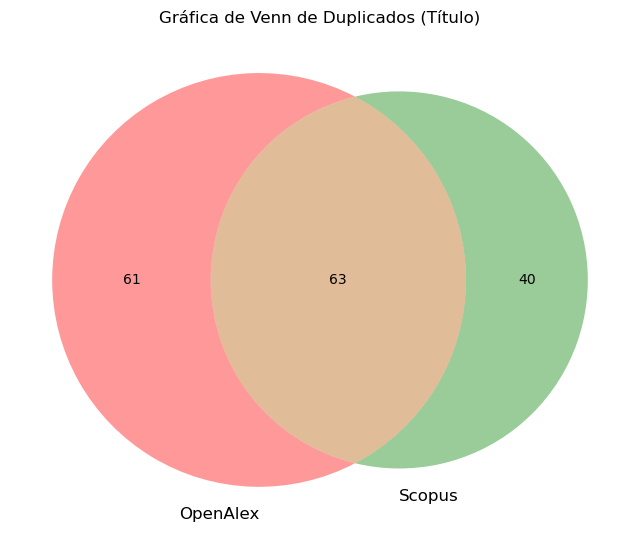

In [3]:
# Crear conjuntos de títulos para cada DataFrame
set1 = set(df1['Title'])
set2 = set(df2['Title'])

# Filtrar el DataFrame de Scopus para excluir los duplicados
scopus_no_duplicates = df2[~df2['Title'].isin(duplicated_df['Title'])]

# Mostrar la lista de Scopus sin duplicados
print("Scopus sin duplicados:")
print(scopus_no_duplicates)

# Guardar los títulos en Scopus que no están en OpenAlex en un archivo CSV
titles_in_scopus_not_in_openalex = set2 - set1
titles_not_in_openalex_df = df2[df2['Title'].isin(titles_in_scopus_not_in_openalex)]
titles_not_in_openalex_df.to_csv('titles_not_in_openalex.csv', index=False)

# Crear la gráfica de Venn con los conjuntos de títulos
plt.figure(figsize=(8, 8))
venn2([set1, set2], ('OpenAlex', 'Scopus'))
plt.title('Gráfica de Venn de Duplicados (Título)')
plt.show()

In [4]:
# Identificar títulos en Scopus que no están en OpenAlex
titles_in_scopus_not_in_openalex = set2 - set1

# Filtrar el DataFrame de Scopus para obtener solo los títulos que no están en OpenAlex
scopus_no_duplicates = df2[df2['Title'].isin(titles_in_scopus_not_in_openalex)]

# Verificar si la columna 'Item Type' existe en el DataFrame
if 'Item Type' in scopus_no_duplicates.columns:
    # Mostrar las cantidades de cada tipo de ítem en scopus_no_duplicates
    item_type_counts = scopus_no_duplicates['Item Type'].value_counts()
    print("Cantidades de cada tipo de ítem en Scopus sin duplicados:")
    print(item_type_counts)
else:
    print("La columna 'Item Type' no existe en el DataFrame.")

Cantidades de cada tipo de ítem en Scopus sin duplicados:
Item Type
journalArticle     31
conferencePaper     9
Name: count, dtype: int64


In [7]:
# Guardar el DataFrame como un archivo RIS
with open('titles_not_in_openalex.ris', 'w') as ris_file:
    for index, row in titles_not_in_openalex_df.iterrows():
        ris_file.write("TY  - JOUR\n")  # Tipo de referencia, puedes ajustarlo según el tipo de documento
        if 'Title' in row and pd.notna(row['Title']):
            ris_file.write(f"TI  - {row['Title']}\n")
        if 'DOI' in row and pd.notna(row['DOI']):
            ris_file.write(f"DO  - {row['DOI']}\n")
        if 'Authors' in row and pd.notna(row['Authors']):
            authors = row['Authors'].split(';')  # Asumiendo que los autores están separados por punto y coma
            for author in authors:
                ris_file.write(f"AU  - {author.strip()}\n")
        if 'Journal' in row and pd.notna(row['Journal']):
            ris_file.write(f"JO  - {row['Journal']}\n")
        if 'Year' in row and pd.notna(row['Year']):
            ris_file.write(f"PY  - {row['Year']}\n")
        if 'Volume' in row and pd.notna(row['Volume']):
            ris_file.write(f"VL  - {row['Volume']}\n")
        if 'Issue' in row and pd.notna(row['Issue']):
            ris_file.write(f"IS  - {row['Issue']}\n")
        if 'Pages' in row and pd.notna(row['Pages']):
            ris_file.write(f"SP  - {row['Pages']}\n")
        if 'Publisher' in row and pd.notna(row['Publisher']):
            ris_file.write(f"PB  - {row['Publisher']}\n")
        if 'Abstract' in row and pd.notna(row['Abstract']):
            ris_file.write(f"AB  - {row['Abstract']}\n")
        if 'Keywords' in row and pd.notna(row['Keywords']):
            keywords = row['Keywords'].split(';')  # Asumiendo que las palabras clave están separadas por punto y coma
            for keyword in keywords:
                ris_file.write(f"KW  - {keyword.strip()}\n")
        ris_file.write("ER  - \n\n")  # Fin de la referencia

In [97]:
df1

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,4HJHXAY4,journalArticle,2019,"Yu, Siwei; Ma, Jianwei; Wang, Wenlong",Deep learning for denoising,Geophysics,NaN,0016-8033,10.1190/geo2018-0668.1,https://doi.org/10.1190/geo2018-0668.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MZIPTLI4,journalArticle,2019,"Mosser, Lukas; Dubrule, Olivier; Blunt, Martin",Stochastic Seismic Waveform Inversion Using Ge...,Mathematical Geosciences,NaN,1874-8953,10.1007/s11004-019-09832-6,https://doi.org/10.1007/s11004-019-09832-6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WZHTWEDS,journalArticle,1998,"Park, Choon; Miller, Richard; Xia, Jianghai",Imaging dispersion curves of surface waves on ...,NaN,NaN,NaN,10.1190/1.1820161,https://doi.org/10.1190/1.1820161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ATC9P2T8,journalArticle,2022,"Rasht‐Behesht, Majid; Huber, Christian; Shukla...",Physics‐Informed Neural Networks (PINNs) for W...,Journal of Geophysical Research Solid Earth,NaN,2169-9313,10.1029/2021jb023120,https://doi.org/10.1029/2021jb023120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V5VQZHD2,journalArticle,2018,"Shi, Yunzhi; Wu, Xinming; Fomel, Sergey",Automatic salt-body classification using deep-...,NaN,NaN,NaN,10.1190/segam2018-2997304.1,https://doi.org/10.1190/segam2018-2997304.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,ZSM85LXP,journalArticle,2011,"Herrmann, Felix",Tackling the “Data Deluge”: a Dimensionality-r...,Proceedings,NaN,2214-4609,10.3997/2214-4609.20144643,https://doi.org/10.3997/2214-4609.20144643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,CZ5DD5RL,journalArticle,2023,"Alfarhan, Mustafa; Ravasi, Matteo; Alkhalifah,...",A deep learning-based inverse Hessian for full...,NaN,NaN,NaN,10.1190/image2023-3908592.1,https://doi.org/10.1190/image2023-3908592.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,SSIGIZFZ,journalArticle,2024,"Li, Chunlong; Zhang, Huai; Zhang, Wei; Gao, Ji...",Deep Learning-Based Data-Driven P/S-Wave Vecto...,IEEE Transactions on Geoscience and Remote Sen...,NaN,0196-2892,10.1109/tgrs.2024.3400875,https://doi.org/10.1109/tgrs.2024.3400875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,CL6A6S2B,journalArticle,2024,"Ma, Haitao; Zhou, Shijie; Wang, Yibo; Wu, Ning...",Improving Distributed Acoustic Sensing Data Qu...,IEEE Geoscience and Remote Sensing Letters,NaN,1545-598X,10.1109/lgrs.2024.3400836,https://doi.org/10.1109/lgrs.2024.3400836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
